In [1]:
# Test migration history reconstruction on simulated data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)
from src.lib import vertex_labeling

from src.util import machina_data_extraction_util as mach_util
from src.util import vertex_labeling_util as vert_util
import matplotlib
import torch

MACHINA_DATA_DIR = os.path.join(repo_dir, 'src/data/machina_sims')


In [6]:
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'cornflowerblue', 'hotpink', 'grey', 'saddlebrown', 'darkorange', 'purple', 'red', 'black', 'black', 'black', 'black']]

def find_labelings_all_mutation_trees(cluster_fn, all_mut_trees_fn, ref_var_fn, use_gen_dist=False):
    cluster_label_to_idx = mach_util.get_cluster_label_to_idx(cluster_fn, ignore_polytomies=True)
    data = mach_util.get_adj_matrices_from_all_mutation_trees(all_mut_trees_fn, cluster_label_to_idx, is_sim_data=True)
    print("num trees:", len(data))
    i = 1
    for adj_matrix, pruned_cluster_label_to_idx in data:
        print(f"TREE {i}")
        T = torch.tensor(adj_matrix, dtype = torch.float32)
        B = vert_util.get_mutation_matrix_tensor(T)
        ref_matrix, var_matrix, unique_sites= mach_util.get_ref_var_matrices_from_machina_sim_data(ref_var_fn, 
                                                                                                   pruned_cluster_label_to_idx=pruned_cluster_label_to_idx,
                                                                                                   T=T)
        G = mach_util.get_genetic_distance_tensor_from_sim_adj_matrix(T, pruned_cluster_label_to_idx)
        G = G if use_gen_dist else None
        print("G\n", G)
        idx_to_label = {v:k for k,v in pruned_cluster_label_to_idx.items()}
        print(idx_to_label)
        print(unique_sites)   
        primary_idx = unique_sites.index('P')
        r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
        weights = vertex_labeling.Weights(data_fit=1.0, mig=3.0, comig=2.0, seed_site=1.0, reg=2.0, gen_dist=0.5)
        vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                                    weights=weights, p=r, node_idx_to_label=idx_to_label, G=G,
                                                    batch_size=64, custom_colors=custom_colors, show_top_trees=True)
        print("*"*100)
        i += 1

import pydot
from IPython.display import Image, display

def visualize_ground_truth(tree_fn, graph_fn):
    def view_pydot(pdot):
        plt = Image(pdot.create_png())
        display(plt)
    
    (graph,) = pydot.graph_from_dot_file(tree_fn)
    view_pydot(graph)

    (graph,) = pydot.graph_from_dot_file(graph_fn)
    view_pydot(graph)
        
        

Ground truth


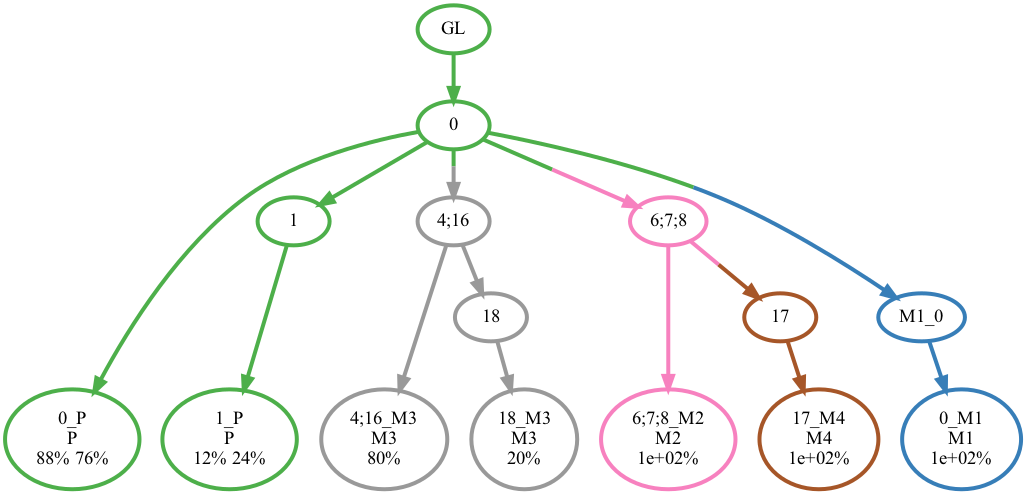

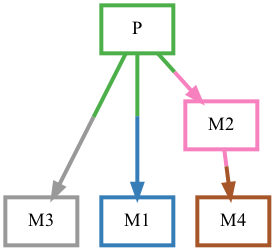

In [7]:
num_sites = "m5"
mig_type = "mS"
SEED = 9
SIM_DATA_DIR = os.path.join(MACHINA_DATA_DIR, num_sites, mig_type)

print("Ground truth")
visualize_ground_truth(os.path.join(SIM_DATA_DIR, f"T_seed{SEED}.dot"), os.path.join(SIM_DATA_DIR, f"G_seed{SEED}.dot"))


num trees: 1
TREE 1
G
 None
{0: '0', 1: '1', 2: '6;7;8', 3: '4;16', 4: '17', 5: '18'}
['P', 'M1', 'M2', 'M3', 'M4']


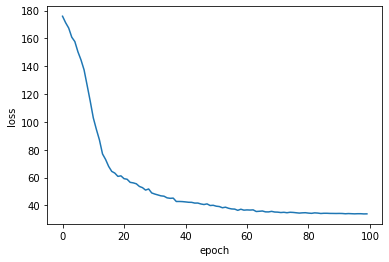

Migration number: 4.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 1.32
Reg: 5.000000476837158
Loss: 33.32


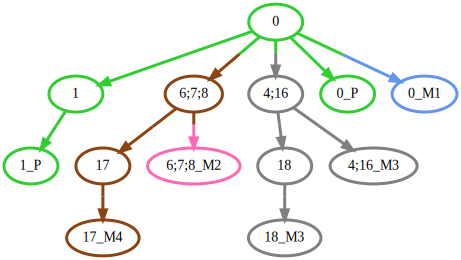

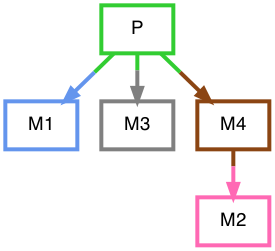

Migration number: 4.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 1.321
Reg: 5.0
Loss: 33.321


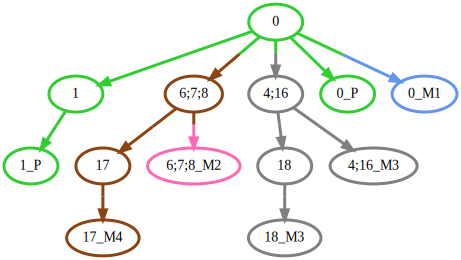

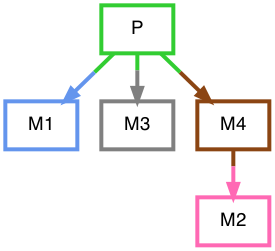

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 1.322
Reg: 5.0
Loss: 33.322


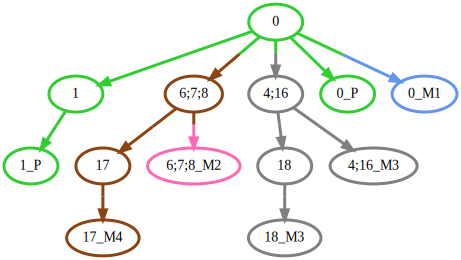

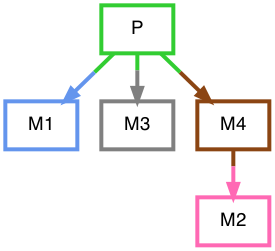

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 1.322
Reg: 5.000000476837158
Loss: 33.322


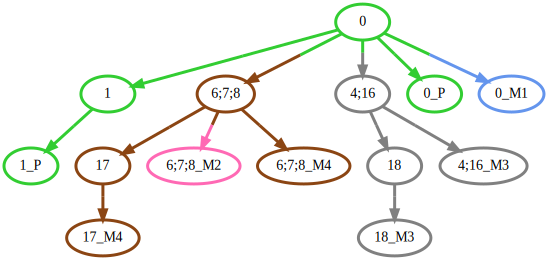

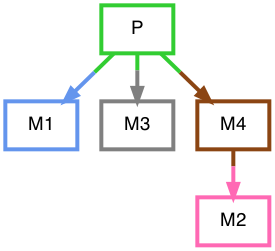

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 1.328
Reg: 5.000000476837158
Loss: 33.328


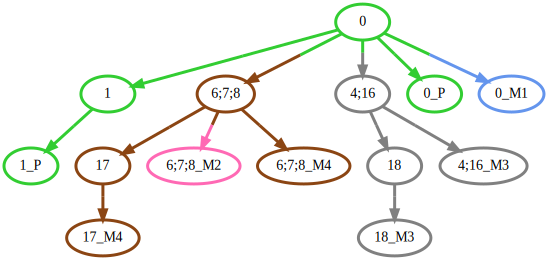

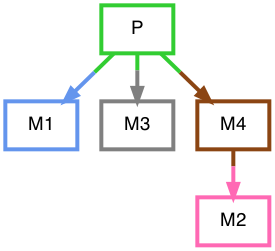

----------------------------------------------------------------------------------------------------

****************************************************************************************************
CPU times: user 23.5 s, sys: 24 s, total: 47.5 s
Wall time: 17.3 s


In [8]:
%%time

find_labelings_all_mutation_trees(os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{SEED}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_mut_trees", f"mut_trees_{mig_type}_seed{SEED}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{SEED}.tsv"),
                                  use_gen_dist=False)




num trees: 1
TREE 1
G
 tensor([[0., 1., 3., 2., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
{0: '0', 1: '1', 2: '6;7;8', 3: '4;16', 4: '17', 5: '18'}
['P', 'M1', 'M2', 'M3', 'M4']


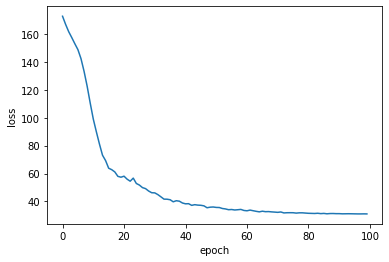

Migration number: 4.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 1.342
Reg: 4.999999523162842
Genetic distance: -6.001
Loss: 30.341


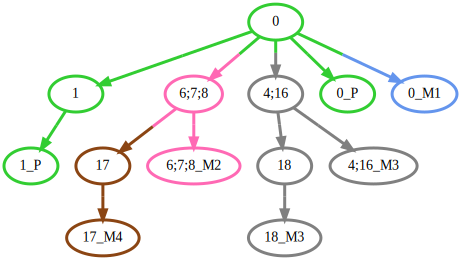

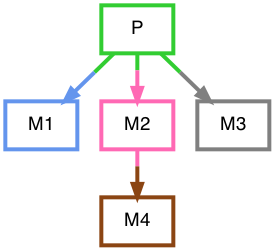

Migration number: 4.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 1.321
Reg: 5.0
Genetic distance: -5.002
Loss: 30.82


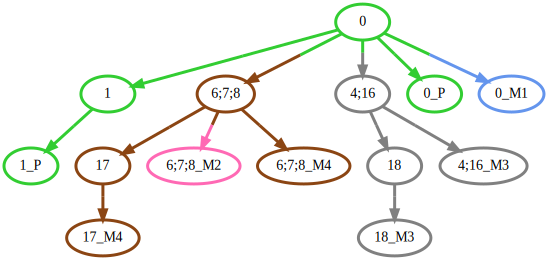

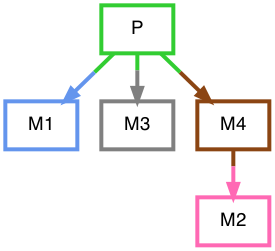

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 1.321
Reg: 5.0
Genetic distance: -5.002
Loss: 30.82


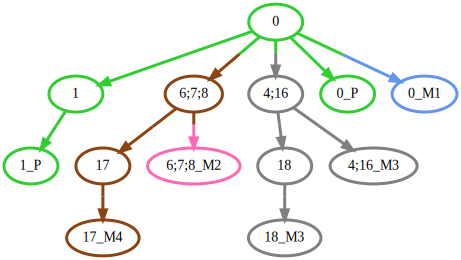

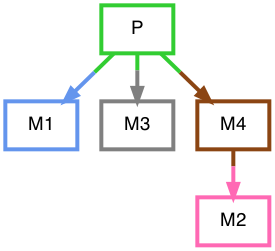

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 1.325
Reg: 5.000000476837158
Genetic distance: -5.002
Loss: 30.824


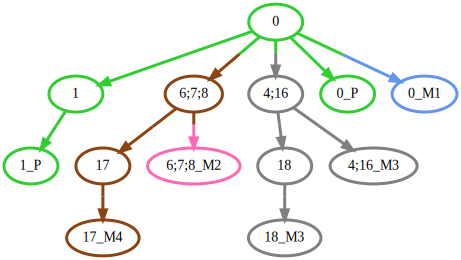

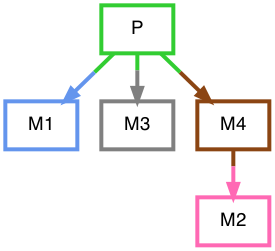

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 1.326
Reg: 5.0
Genetic distance: -5.002
Loss: 30.825


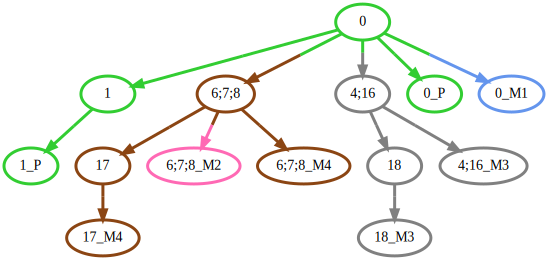

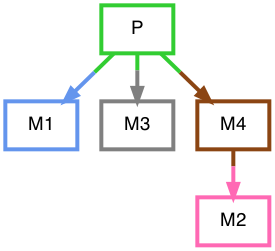

----------------------------------------------------------------------------------------------------

****************************************************************************************************
CPU times: user 27.1 s, sys: 30.6 s, total: 57.7 s
Wall time: 18.4 s


In [9]:
%%time

find_labelings_all_mutation_trees(os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{SEED}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_mut_trees", f"mut_trees_{mig_type}_seed{SEED}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{SEED}.tsv"),
                                  use_gen_dist=True)


